## Dataset Information

 The data scientists at BigMart have collected 2013 sales data for 1559 products across 10 stores in different cities. Also, certain attributes of each product and store have been defined. The aim is to build a predictive model and find out the sales of each product at a particular store.

## Importing libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')

## Loading the dataset

In [2]:
df = pd.read_csv(r"C:\Users\Admin\Downloads\Train.csv")
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [3]:
# statistical info
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [4]:
# datatype of attributes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [5]:
# check unique values in dataset
df.apply(lambda x: len(x.unique()))

Item_Identifier              1559
Item_Weight                   416
Item_Fat_Content                5
Item_Visibility              7880
Item_Type                      16
Item_MRP                     5938
Outlet_Identifier              10
Outlet_Establishment_Year       9
Outlet_Size                     4
Outlet_Location_Type            3
Outlet_Type                     4
Item_Outlet_Sales            3493
dtype: int64

## Preprocessing the dataset

In [6]:
# check for null values
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [7]:
# check for categorical attributes
cat_col = []
for x in df.dtypes.index:
    if df.dtypes[x] == 'object':
        cat_col.append(x)
cat_col

['Item_Identifier',
 'Item_Fat_Content',
 'Item_Type',
 'Outlet_Identifier',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type']

In [8]:
cat_col.remove('Item_Identifier')
cat_col.remove('Outlet_Identifier')
cat_col

['Item_Fat_Content',
 'Item_Type',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type']

In [9]:
# print the categorical columns
for col in cat_col:
    print(col)
    print(df[col].value_counts())
    print()

Item_Fat_Content
Item_Fat_Content
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: count, dtype: int64

Item_Type
Item_Type
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: count, dtype: int64

Outlet_Size
Outlet_Size
Medium    2793
Small     2388
High       932
Name: count, dtype: int64

Outlet_Location_Type
Outlet_Location_Type
Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: count, dtype: int64

Outlet_Type
Outlet_Type
Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2   

In [10]:
# fill the missing values
item_weight_mean = df.pivot_table(values = "Item_Weight", index = 'Item_Identifier')
item_weight_mean

,Item_Weight
Item_Identifier,
DRA12,11.600
DRA24,19.350
DRA59,8.270
DRB01,7.390
DRB13,6.115
...,...
NCZ30,6.590
NCZ41,19.850
NCZ42,10.500


In [11]:
miss_bool = df['Item_Weight'].isnull()
miss_bool

0       False
1       False
2       False
3       False
4       False
        ...  
8518    False
8519    False
8520    False
8521    False
8522    False
Name: Item_Weight, Length: 8523, dtype: bool

In [12]:
for i, item in enumerate(df['Item_Identifier']):
    if miss_bool[i]:
        if item in item_weight_mean:
            df['Item_Weight'][i] = item_weight_mean.loc[item]['Item_Weight']
        else:
            df['Item_Weight'][i] = np.mean(df['Item_Weight'])

In [13]:
df['Item_Weight'].isnull().sum()

0

In [14]:
outlet_size_mode = df.pivot_table(values='Outlet_Size', columns='Outlet_Type', aggfunc=(lambda x: x.mode()[0]))
outlet_size_mode

Outlet_Type,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
Outlet_Size,Small,Small,Medium,Medium


In [15]:
miss_bool = df['Outlet_Size'].isnull()
df.loc[miss_bool, 'Outlet_Size'] = df.loc[miss_bool, 'Outlet_Type'].apply(lambda x: outlet_size_mode[x])

In [16]:
df['Outlet_Size'].isnull().sum()

0

In [17]:
sum(df['Item_Visibility']==0)

526

In [18]:
# replace zeros with mean
df.loc[:, 'Item_Visibility'].replace([0], [df['Item_Visibility'].mean()], inplace=True)

In [19]:
sum(df['Item_Visibility']==0)

0

In [20]:
# Calculate the mean of Item_Weight
item_weight_mean = df['Item_Weight'].mean()

# Fill missing values in Item_Weight with the mean
df['Item_Weight'] = df['Item_Weight'].fillna(item_weight_mean)


In [21]:
df['Item_Weight'].isnull().sum()

0

In [22]:
# combine item fat content
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace({'LF':'Low Fat', 'reg':'Regular', 'low fat':'Low Fat'})
df['Item_Fat_Content'].value_counts()

Item_Fat_Content
Low Fat    5517
Regular    3006
Name: count, dtype: int64

## Creation of New Attributes

In [23]:
df['New_Item_Type'] = df['Item_Identifier'].apply(lambda x: x[:2])
df['New_Item_Type']

0       FD
1       DR
2       FD
3       FD
4       NC
        ..
8518    FD
8519    FD
8520    NC
8521    FD
8522    DR
Name: New_Item_Type, Length: 8523, dtype: object

In [24]:
df['New_Item_Type'] = df['New_Item_Type'].map({'FD':'Food', 'NC':'Non-Consumable', 'DR':'Drinks'})
df['New_Item_Type'].value_counts()

New_Item_Type
Food              6125
Non-Consumable    1599
Drinks             799
Name: count, dtype: int64

In [25]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,New_Item_Type
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,Food
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,Drinks
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,Food
3,FDX07,19.20,Regular,0.066132,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800,Food
4,NCD19,8.93,Low Fat,0.066132,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,Non-Consumable


## Exploratory Data Analysis

<Axes: xlabel='Item_Weight', ylabel='Density'>

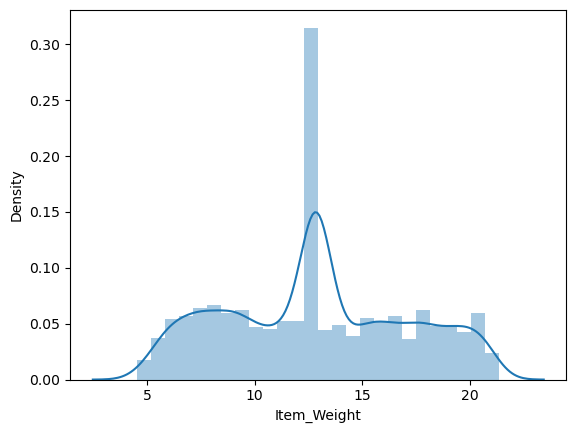

In [26]:
#to check the normality we will use the distplot for Item_Weight
sns.distplot(df['Item_Weight'])

<Axes: xlabel='Item_Visibility', ylabel='Density'>

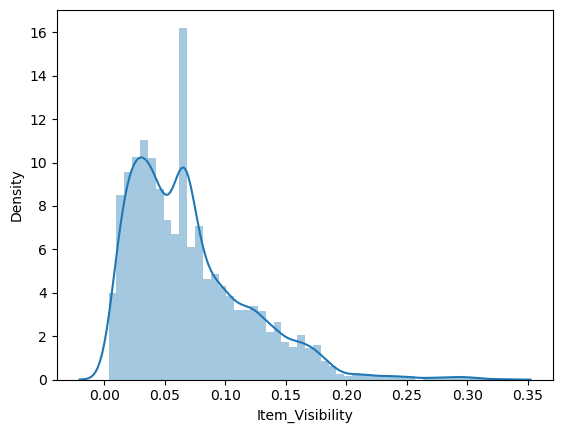

In [27]:
#to check the normality we will use the distplot for Item_Visibility
sns.distplot(df['Item_Visibility'])

<Axes: xlabel='Item_MRP', ylabel='Density'>

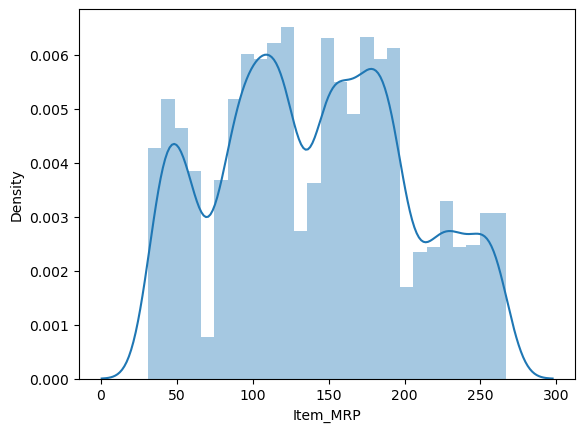

In [28]:
#to check the normality we will use the distplot for Item_MRP
sns.distplot(df['Item_MRP'])

<Axes: xlabel='Item_Outlet_Sales', ylabel='Density'>

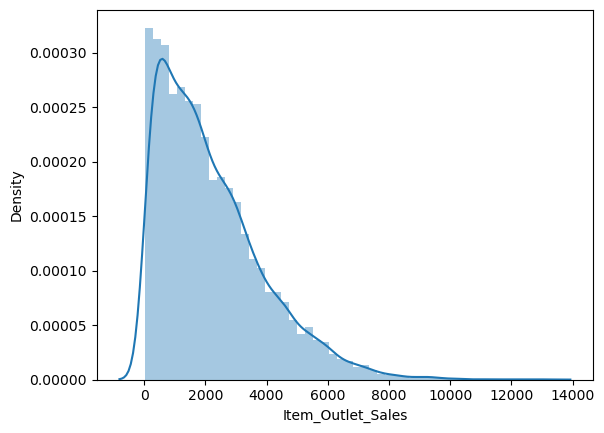

In [29]:
#to check the normality we will use the distplot for Item_Outlet_Sales
sns.distplot(df['Item_Outlet_Sales'])

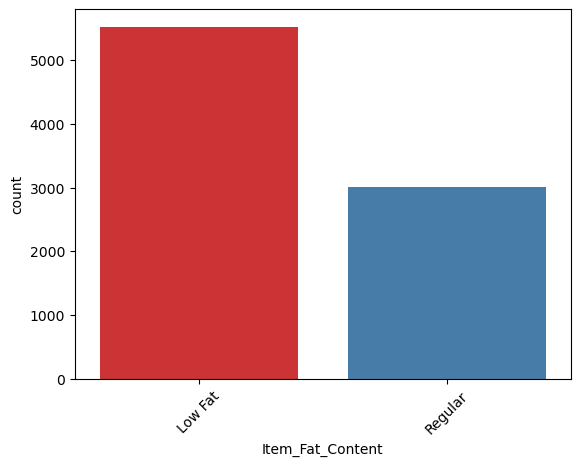

In [30]:
# by using the countplot we can see the different type of Item_Fat_Content

sns.countplot(x='Item_Fat_Content',data=df,palette="Set1")

#Rotate x-labels
plt.xticks(rotation=45);

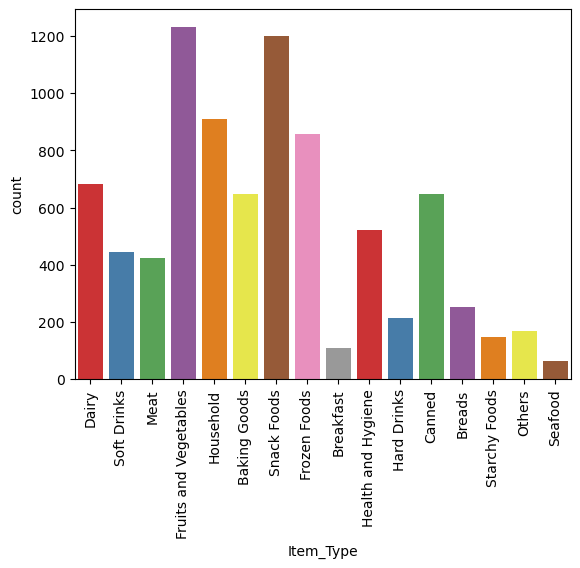

In [31]:
# by using the countplot we can see the different type of Item_Type

sns.countplot(x='Item_Type',data=df,palette="Set1")

#Rotate x-labels
plt.xticks(rotation=90);

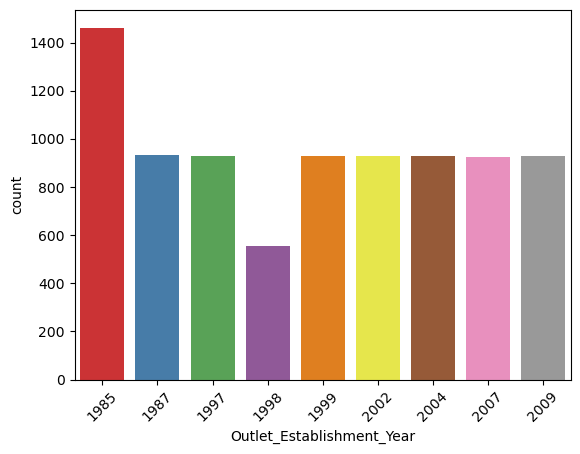

In [32]:
# by using the countplot we can see the different type of Outlet_Establishment_Year

sns.countplot(x='Outlet_Establishment_Year',data=df,palette="Set1")

#Rotate x-labels
plt.xticks(rotation=45);

<Axes: xlabel='Outlet_Size', ylabel='count'>

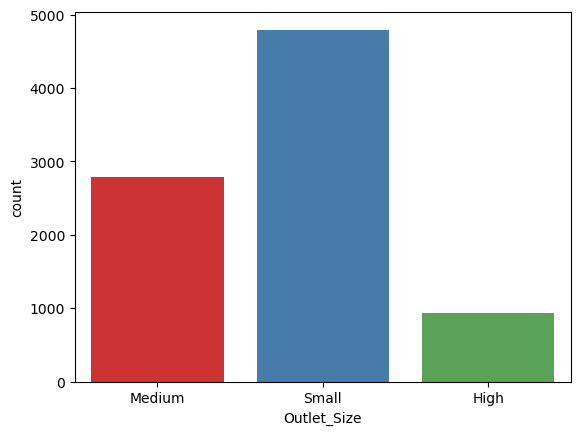

In [33]:
# by using the countplot we can see the different type of Outlet_Size

sns.countplot(x='Outlet_Size',data=df,palette="Set1")


<Axes: xlabel='Outlet_Location_Type', ylabel='count'>

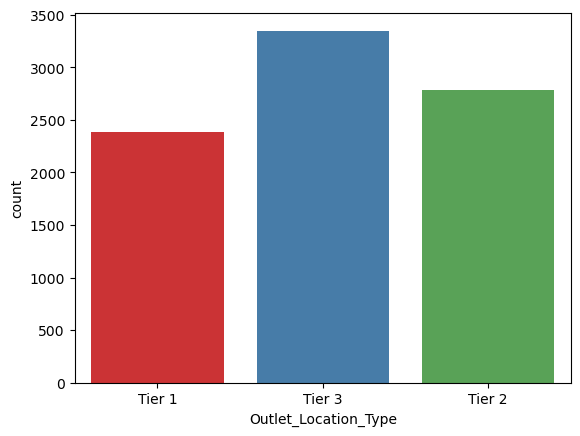

In [34]:
# by using the countplot we can see the different type of Outlet_Location_Size

sns.countplot(x='Outlet_Location_Type',data=df,palette="Set1")


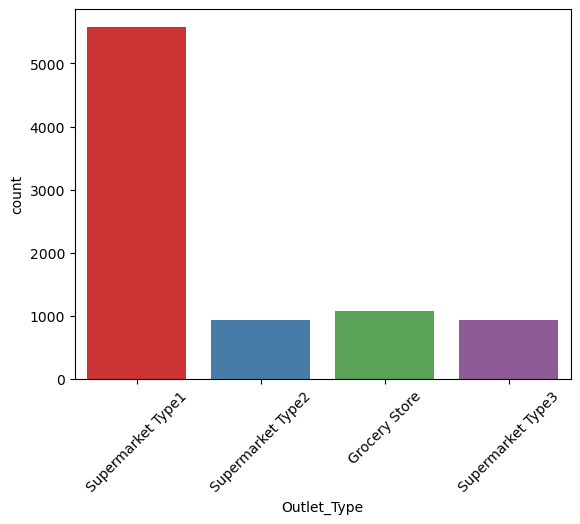

In [35]:
# by using the countplot we can see the different type of Outlet_Type

sns.countplot(x='Outlet_Type',data=df,palette="Set1")
plt.xticks(rotation=45);

## Correlation Matrix

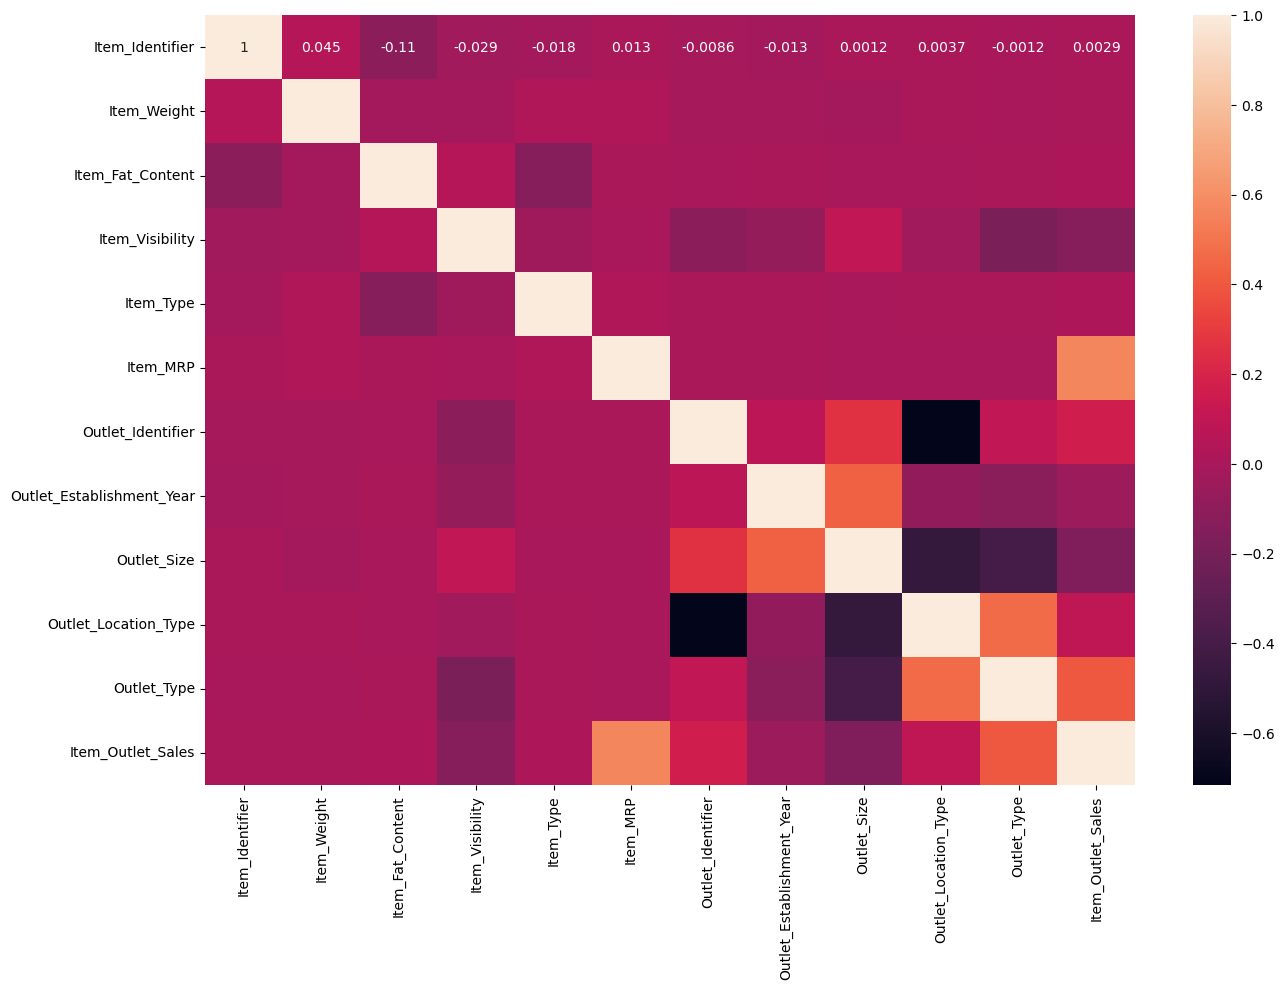

In [64]:
plt.figure(figsize=(15, 10))
corr=df.corr()
sns.heatmap(corr,annot=True)
plt.show();

As we can see in the above correlation that Outlet_Identifier & Outlet_Location_Type are highly correlated to each other.

In [ ]:
#df.drop(["Outlet_Identifier"],axis=1,inplace=True)

In [37]:
df.drop(["New_Item_Type"],axis=1,inplace=True)

In [ ]:
#df.drop(["Outlet_Location_Type"],axis=1,inplace=True)

In [38]:
colname=[]

for n in df.columns:
    if df[n].dtype=='object':
        colname.append(n)
colname

['Item_Identifier',
 'Item_Fat_Content',
 'Item_Type',
 'Outlet_Identifier',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type']

## Label Encoding

In [39]:
from sklearn.preprocessing import LabelEncoder
 
le=LabelEncoder()
 
for x in colname:
    df[x]=le.fit_transform(df[x])

In [40]:
df.head(10)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,156,9.300000,0,0.016047,4,249.8092,9,1999,1,0,1,3735.1380
1,8,5.920000,1,0.019278,14,48.2692,3,2009,1,2,2,443.4228
2,662,17.500000,0,0.016760,10,141.6180,9,1999,1,0,1,2097.2700
3,1121,19.200000,1,0.066132,6,182.0950,0,1998,2,2,0,732.3800
4,1297,8.930000,0,0.066132,9,53.8614,1,1987,0,2,1,994.7052
5,758,10.395000,1,0.066132,0,51.4008,3,2009,1,2,2,556.6088
6,696,13.650000,1,0.012741,13,57.6588,1,1987,0,2,1,343.5528
7,738,12.857645,0,0.127470,13,107.7622,5,1985,1,2,3,4022.7636
8,440,16.200000,1,0.016687,5,96.9726,7,2002,2,1,1,1076.5986
9,990,19.200000,1,0.094450,5,187.8214,2,2007,2,1,1,4710.5350


## Create X & Y

In [41]:

X=df.values[:,0:-1]
Y=df.values[:,-1]

In [42]:
print(X.shape)
print(Y.shape)

(8523, 11)
(8523,)


In [43]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=10)  

In [44]:
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()

scaler.fit(X)
X = scaler.transform(X)

## Training the model

## Using Linear Regression

In [45]:
from sklearn.linear_model import LinearRegression
#create a model object
lm=LinearRegression()
#train the model object
lm.fit(X_train,Y_train) #fit is used for training the model to teach the model

LinearRegression()

In [46]:
Y_pred=lm.predict(X_test)
print(Y_pred)

[4125.89199963 1659.10622426 2883.82864226 ... 1264.09183184 -316.78139934
 2583.63070668]


In [47]:
from sklearn.metrics import r2_score,mean_squared_error
import numpy as np
 
r2=r2_score(Y_test,Y_pred)
print("R-squared:",r2)
 
rmse=np.sqrt(mean_squared_error(Y_test,Y_pred))
print("RMSE:",rmse)
 
adjusted_r_squared = 1 - (1-r2)*(len(Y)-1)/(len(Y)-X.shape[1]-1)
print("Adj R-square:",adjusted_r_squared)

R-squared: 0.5012284044974288
RMSE: 1205.6613523880555
Adj R-square: 0.5005837696072246


## Ridge Regression to the training set

In [48]:
from sklearn.linear_model import Ridge
rid =Ridge()
rid.fit(X_train,Y_train)

Ridge()

In [49]:
Y_pred=rid.predict(X_test)
print(Y_pred)

[4129.72739532 1661.01682985 2884.68700947 ... 1272.05501212 -304.29723025
 2580.73489138]


In [50]:
from sklearn.metrics import r2_score,mean_squared_error
import numpy as np
 
r2=r2_score(Y_test,Y_pred)
print(r2)
 
rmse=np.sqrt(mean_squared_error(Y_test,Y_pred))
print(rmse)
 
adjusted_r_squared = 1 - (1-r2)*(len(Y)-1)/(len(Y)-X.shape[1]-1)
print(adjusted_r_squared)

0.5011845072602258
1205.7144067704671
0.5005398156352536


## Lasso Regression to the training set


In [51]:
from sklearn.linear_model import Lasso
las =Lasso()
las.fit(X_train,Y_train)


Lasso()

In [52]:
Y_pred=las.predict(X_test)
print(Y_pred)

[4143.50423027 1662.8765864  2889.48623616 ... 1303.47495292 -272.32804891
 2569.35229483]


In [53]:
from sklearn.metrics import r2_score,mean_squared_error
import numpy as np
 
r2=r2_score(Y_test,Y_pred)
print(r2)
 
rmse=np.sqrt(mean_squared_error(Y_test,Y_pred))
print(rmse)
 
adjusted_r_squared = 1 - (1-r2)*(len(Y)-1)/(len(Y)-X.shape[1]-1)
print(adjusted_r_squared)

0.500894324057584
1206.0650646820586
0.500249257386762


##  Training the model using Decision Tree

In [54]:
from sklearn.tree import DecisionTreeRegressor

# Create a model object
model_DecisionTree = DecisionTreeRegressor(random_state=10, criterion='squared_error')  

# Fit the model on the data and predict the values 
model_DecisionTree.fit(X_train, Y_train)
Y_pred = model_DecisionTree.predict(X_test)

In [55]:
from sklearn.metrics import r2_score,mean_squared_error
import numpy as np
 
r2=r2_score(Y_test,Y_pred)
print(r2)
 
rmse=np.sqrt(mean_squared_error(Y_test,Y_pred))
print(rmse)
 
adjusted_r_squared = 1 - (1-r2)*(len(Y)-1)/(len(Y)-X.shape[1]-1)
print(adjusted_r_squared)

0.149318831352244
1574.5552083532584
0.14821937266876084


##  Training the model using Random Forest

In [56]:
from sklearn.ensemble import RandomForestRegressor

# Create a RandomForestRegressor model object
model_RandomForest = RandomForestRegressor(n_estimators=100,
                                            random_state=10,
                                            n_jobs=-1)  # You can adjust other parameters as needed

# Fit the model on the data and predict the values
model_RandomForest.fit(X_train, Y_train)
Y_pred = model_RandomForest.predict(X_test)


In [57]:
from sklearn.metrics import r2_score,mean_squared_error
import numpy as np
 
r2=r2_score(Y_test,Y_pred)
print(r2)
 
rmse=np.sqrt(mean_squared_error(Y_test,Y_pred))
print(rmse)
 
adjusted_r_squared = 1 - (1-r2)*(len(Y)-1)/(len(Y)-X.shape[1]-1)
print(adjusted_r_squared)

0.541624686044448
1155.8063962622243
0.5410322611292193


##  Training the model using ExtraTreesRegressor

In [58]:
from sklearn.ensemble import ExtraTreesRegressor

# Create an ExtraTreesRegressor model object
model_ExtraTrees = ExtraTreesRegressor(n_estimators=151, random_state=10)

# Fit the model on the data
model_ExtraTrees.fit(X_train, Y_train)

# Predict the values
Y_pred = model_ExtraTrees.predict(X_test)



In [59]:
from sklearn.metrics import r2_score,mean_squared_error
import numpy as np
 
r2=r2_score(Y_test,Y_pred)
print(r2)
 
rmse=np.sqrt(mean_squared_error(Y_test,Y_pred))
print(rmse)
 
adjusted_r_squared = 1 - (1-r2)*(len(Y)-1)/(len(Y)-X.shape[1]-1)
print(adjusted_r_squared)

0.5384733803724058
1159.7726444607626
0.5378768825676938


##  Training the model using AdaBoostRegressor

In [60]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor

# Create an AdaBoostRegressor model object with DecisionTreeRegressor as base estimator
model_AdaBoost = AdaBoostRegressor(base_estimator=DecisionTreeRegressor(random_state=10),
                                   n_estimators=250,
                                   random_state=10)

# Fit the model on the data
model_AdaBoost.fit(X_train, Y_train)

# Predict the values
Y_pred = model_AdaBoost.predict(X_test)


In [61]:
from sklearn.metrics import r2_score,mean_squared_error
import numpy as np
 
r2=r2_score(Y_test,Y_pred)
print(r2)
 
rmse=np.sqrt(mean_squared_error(Y_test,Y_pred))
print(rmse)
 
adjusted_r_squared = 1 - (1-r2)*(len(Y)-1)/(len(Y)-X.shape[1]-1)
print(adjusted_r_squared)

0.4773175071014495
1234.222502334909
0.4766419686897606


In [ ]:
!pip install xgboost

##  Training the model using GradientBoosting

In [62]:
from xgboost import XGBRegressor

# Create an XGBRegressor model object
model_XGBoost = XGBRegressor(n_estimators=10000,
                              random_state=10)

# Fit the model on the data
model_XGBoost.fit(X_train, Y_train)

# Predict the values
Y_pred = model_XGBoost.predict(X_test)


In [63]:
from sklearn.metrics import r2_score,mean_squared_error
import numpy as np
 
r2=r2_score(Y_test,Y_pred)
print(r2)

rmse=np.sqrt(mean_squared_error(Y_test,Y_pred))
print(rmse)
 
adjusted_r_squared = 1 - (1-r2)*(len(Y)-1)/(len(Y)-X.shape[1]-1)
print(adjusted_r_squared)

0.3899300657967435
1333.411801301746
0.3891415839172656


## Conclusion by applying different algorithms the final insights are:
"""LinearRegressor:RMSE-1207.7987325450413
Ridge: RMSE-1208.1562851328106
Lasso: RMSE-1208.1562851328106
DecisionTreeRegressor: RMSE-1567.4915472851526
RandomForestRegressor: RMSE-1155.8321520450575
ExtraTreesRegressor: RMSE -1159.7726444607626
AdaBoostRegressor: RMSE-1234.222502334909
GradientBoosting: RMSE- 1333.411801301746"""